### Understanding the data

We are provided with 3 kind of data sets: The **districts_info.csv** file contains information about each school district and the **products_info.csv** file contains information about the top 370 tools used for digital learning. For each school district, there is an additional file that contains the **engagement** for each tool for everyday in 2020.

***--------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

The district file `districts_info.csv` includes information about the characteristics of school districts.

**district_id**- The unique identifier of the school district

**state**- The state where the district resides in

**locale**- NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural.

**pct_black/hispanic**-Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data

**pct_free/reduced**-Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data

**county_connections_ratio**-`ratio` (residential fixed high-speed connections over 200 kbps in at least one direction/households)

**pp_total_raw**- Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

***--------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

The product file `products_info.csv` includes information about the characteristics of the top 372 products with most users in 2020.

**LP ID**- The unique identifier of the product 

**URL**- Web Link to the specific product 

**Product Name**- Name of the specific product 

**Provider/Company Name**- Name of the product provider 

**Sector(s)**- Sector of education where the product is used 

**Primary Essential Function**The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: 
LC = Learning & Curriculum, 
CM = Classroom Management, and 
SDO = School & District Operations. 
Each of these categories have multiple sub-categories with which the products were labeled 


***--------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

The engagement data are aggregated at school district level, and each file in the folder `engagement_data` represents data from one school district. The 4-digit file name represents `district_id` which can be used to link to district information in `district_info.csv`. The `lp_id` can be used to link to product information in `product_info.csv`.

**time**- date in "YYYY-MM-DD" 

**lp_id**- The unique identifier of the product 

**pct_access**- Percentage of students in the district have at least one page-load event of a given product and on a given day 

**engagement_index**- Total page-load events per one thousand students of a given product and on a given day

***--------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

### Objective:
(1) the state of digital learning in 2020

(2) how the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events.

In [1]:
#importing relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from datetime import datetime as dt
init_notebook_mode(connected=True)
%matplotlib inline 
import pandas as pd

In [2]:
districts= pd.read_csv('districts_info.csv')
products=pd.read_csv('products_info.csv')

In [3]:
districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [5]:
#dropping all rows where state is Nan
districts.dropna(axis=0,subset=['state'],inplace=True)

In [6]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               176 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.0+ KB


In [7]:
districts.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


In [8]:
districts['locale'].value_counts()

Suburb    104
Rural      33
City       29
Town       10
Name: locale, dtype: int64

In [9]:
districts['state'].value_counts()  #23 states

Connecticut             30
Utah                    29
Massachusetts           21
Illinois                18
California              12
Ohio                    11
New York                 8
Indiana                  7
Missouri                 6
Washington               6
North Carolina           4
Virginia                 4
District Of Columbia     3
Wisconsin                3
Texas                    2
New Hampshire            2
New Jersey               2
Tennessee                2
Michigan                 2
Florida                  1
North Dakota             1
Minnesota                1
Arizona                  1
Name: state, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Illinois'),
  Text(1, 0, 'Utah'),
  Text(2, 0, 'Wisconsin'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Missouri'),
  Text(5, 0, 'Washington'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Massachusetts'),
  Text(8, 0, 'New York'),
  Text(9, 0, 'Indiana'),
  Text(10, 0, 'Virginia'),
  Text(11, 0, 'Ohio'),
  Text(12, 0, 'New Jersey'),
  Text(13, 0, 'California'),
  Text(14, 0, 'District Of Columbia'),
  Text(15, 0, 'Minnesota'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Texas'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Florida'),
  Text(20, 0, 'North Dakota'),
  Text(21, 0, 'New Hampshire'),
  Text(22, 0, 'Michigan')])

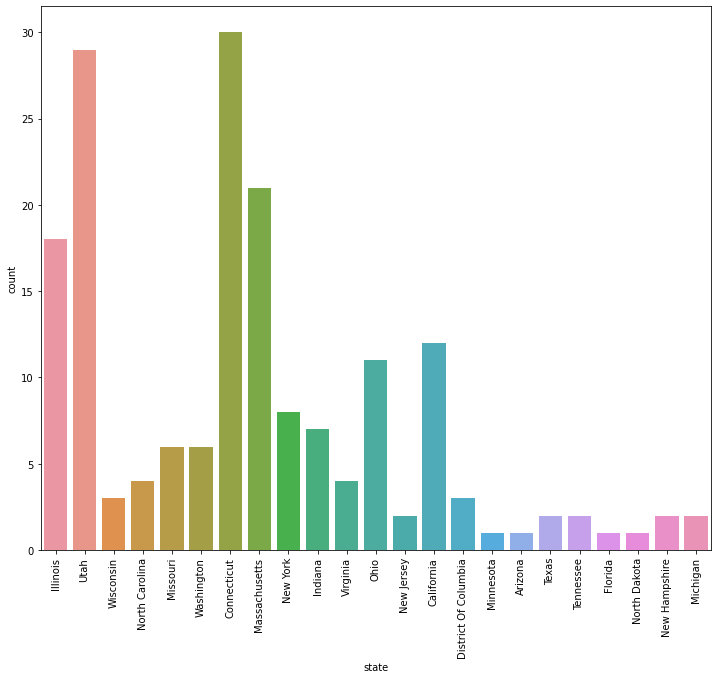

In [10]:
#Distribution of states
plt.figure(figsize=(12,10))
sns.countplot(districts['state'])
plt.xticks(rotation=90)

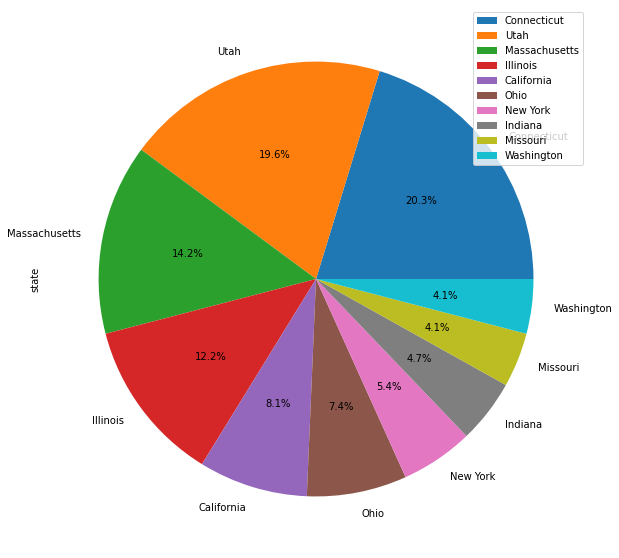

In [11]:
#Pie-chart showing top 10 states
districts['state'].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%',figsize=(10, 10),startangle=0).legend()

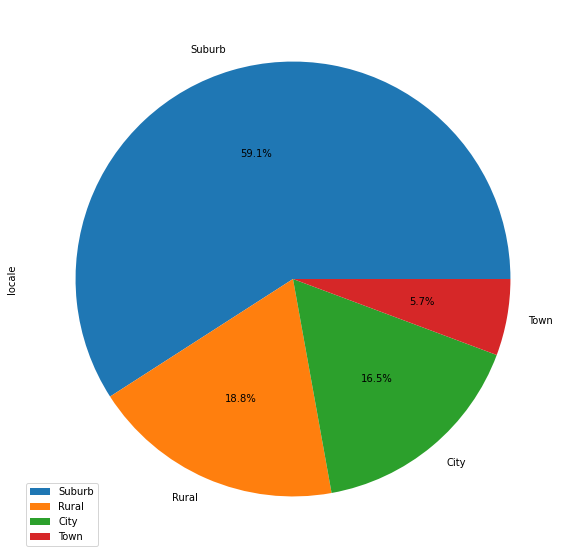

In [12]:
#distribution of locale
districts['locale'].value_counts().plot(kind = 'pie', autopct='%1.1f%%',figsize=(10, 10),startangle=0).legend()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='pct_black/hispanic', ylabel='count'>

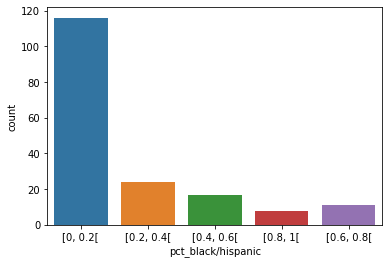

In [13]:

sns.countplot(districts['pct_black/hispanic'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='pct_free/reduced', ylabel='count'>

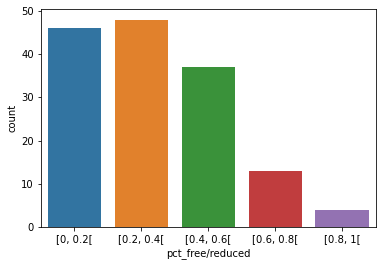

In [14]:
sns.countplot(districts['pct_free/reduced'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='county_connections_ratio', ylabel='count'>

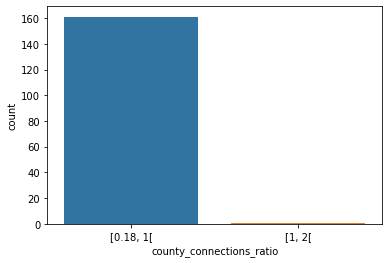

In [15]:
sns.countplot(districts['county_connections_ratio'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='pp_total_raw', ylabel='count'>

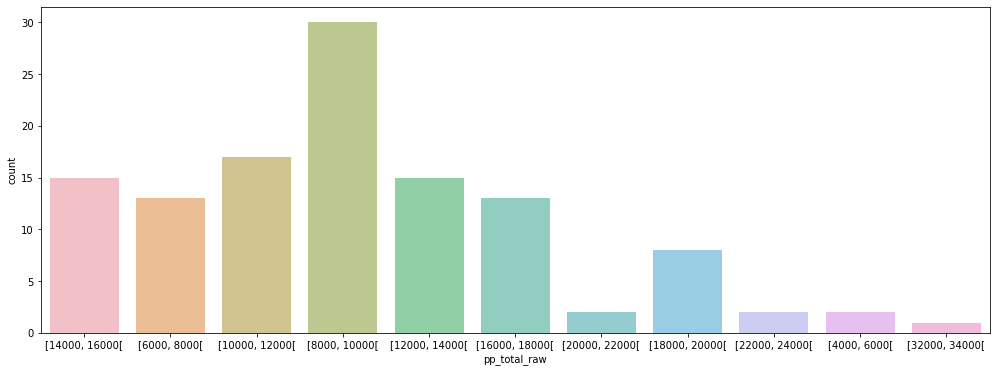

In [16]:
plt.figure(figsize=(17,6))
sns.countplot(districts['pp_total_raw'], alpha=0.6)

In [17]:
products.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


LP ID, URL and Product Name column have 372 distinct values.

In [19]:
products['Provider/Company Name'].value_counts().head(20)

Google LLC                                                 30
Microsoft                                                   6
Houghton Mifflin Harcourt                                   6
Learning A-Z                                                4
IXL Learning                                                4
McGraw-Hill PreK-12                                         3
Scholastic Inc                                              3
Savvas Learning Company | Formerly Pearson K12 Learning     3
The College Board                                           3
ExploreLearning, LLC                                        3
Curriculum Associates                                       3
PBS                                                         3
Adobe Inc.                                                  3
 Autodesk, Inc                                              3
Dictionary.com                                              2
Teaching.com                                                2
LinkedIn

In [20]:
products['Sector(s)'].value_counts()

PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Higher Ed; Corporate               1
Corporate                          1
Name: Sector(s), dtype: int64

In [21]:
products['Primary Essential Function'].value_counts()

LC - Digital Learning Platforms                                              74
LC - Sites, Resources & Reference                                            47
LC - Content Creation & Curation                                             36
LC - Study Tools                                                             25
LC - Courseware & Textbooks                                                  18
LC - Sites, Resources & Reference - Games & Simulations                      18
LC/CM/SDO - Other                                                            16
LC - Sites, Resources & Reference - Digital Collection & Repository          15
CM - Classroom Engagement & Instruction - Classroom Management               11
LC - Sites, Resources & Reference - Streaming Services                        9
CM - Virtual Classroom - Video Conferencing & Screen Sharing                  7
LC - Study Tools - Q&A                                                        6
SDO - Data, Analytics & Reporting - Site

In [22]:
products['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x==x else x).value_counts()

Sites, Resources & Reference                              97
Digital Learning Platforms                                74
Content Creation & Curation                               36
Study Tools                                               35
Classroom Engagement & Instruction                        20
Courseware & Textbooks                                    18
Other                                                     18
Data, Analytics & Reporting                               11
Virtual Classroom                                          7
Teacher Resources                                          7
Learning Management Systems (LMS)                          5
Online Course Providers & Technical Skills Development     5
School Management Software                                 4
Human Resources                                            4
Sites, Resources & References                              4
Career Planning & Job Search                               3
Large-Scale & Standardiz

we can see there are 2 similar values here- 1) 'Sites, Resources & Reference' and 2) 'Sites, Resources & References'. We will make them the same by replacing 2nd by 1st.

In [23]:
#Dividing column 'Primary Essential Function' in 2 parts- main and sub
products['primary_function_main']=products['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x==x else x)
products['primary_function_sub']=products['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x==x else x)

#Replacing similar values in sub column
products['primary_function_sub'] = products['primary_function_sub'].replace({'Sites, Resources & References' : 
                                                                             'Sites, Resources & Reference'})

#dropping the original column
products.drop("Primary Essential Function", axis=1, inplace=True)



In [24]:
products.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),primary_function_main,primary_function_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC,Digital Learning Platforms


<AxesSubplot:>

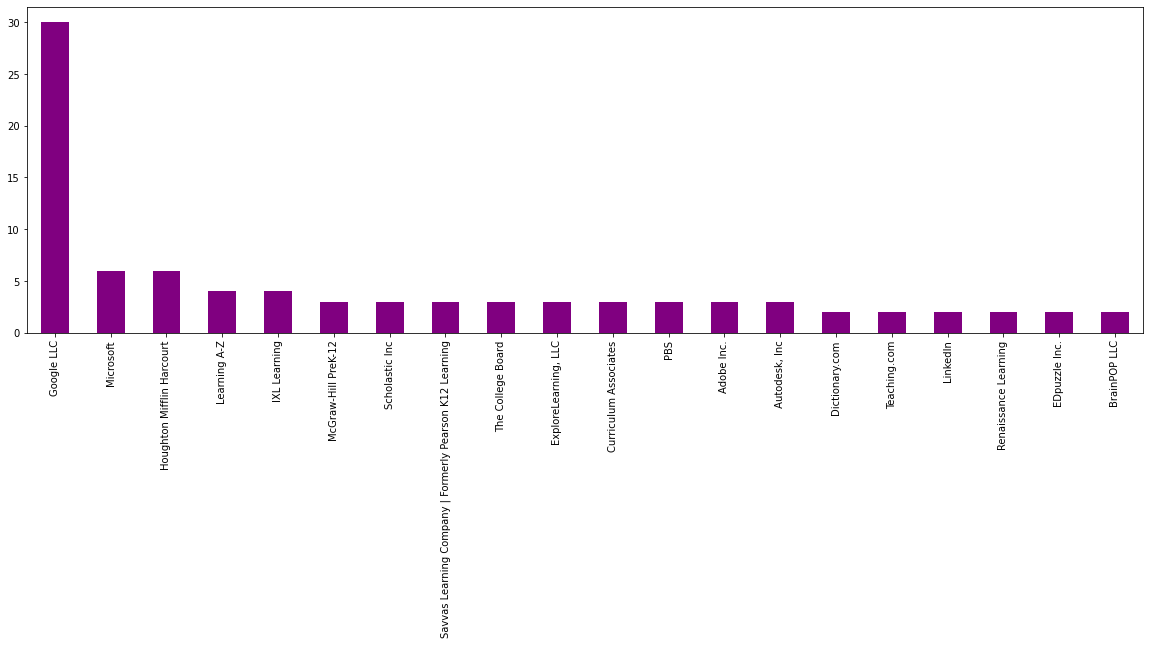

In [25]:
plt.figure(figsize=(20,6))
products['Provider/Company Name'].value_counts().head(20).plot(kind='bar', color='purple')

It is clear from the graph above that google provided the most learning products(33) followed by microsoft(6), houghton(6) etc.

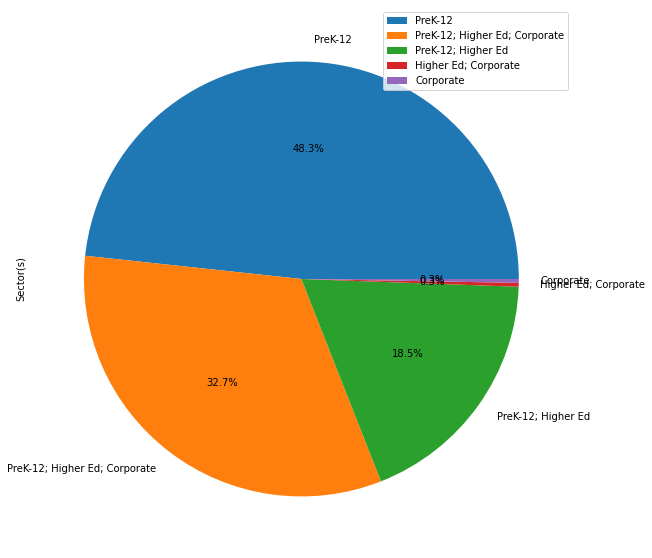

In [26]:
products['Sector(s)'].value_counts().plot(kind = 'pie', autopct='%1.1f%%',figsize=(10, 10),startangle=0).legend()

The above graph shows that most digital learning providers are active in sector PreK-12 (48.3%+32.7%+18.5%=99.5)and very few(0.5%) in Corporate sector.

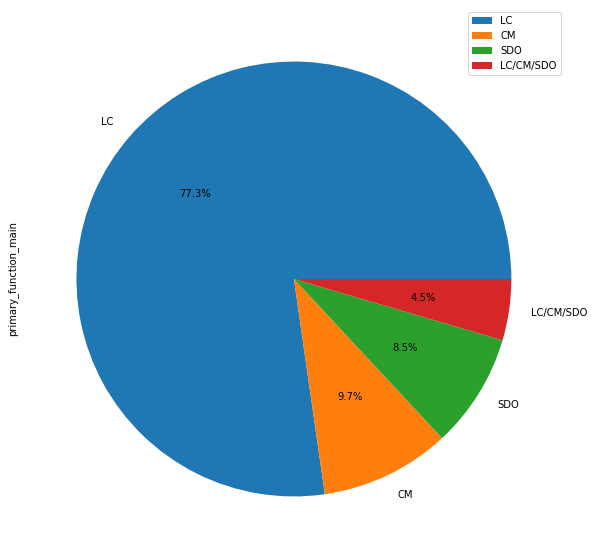

In [27]:
products['primary_function_main'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(10, 10),startangle=0).legend()

<AxesSubplot:>

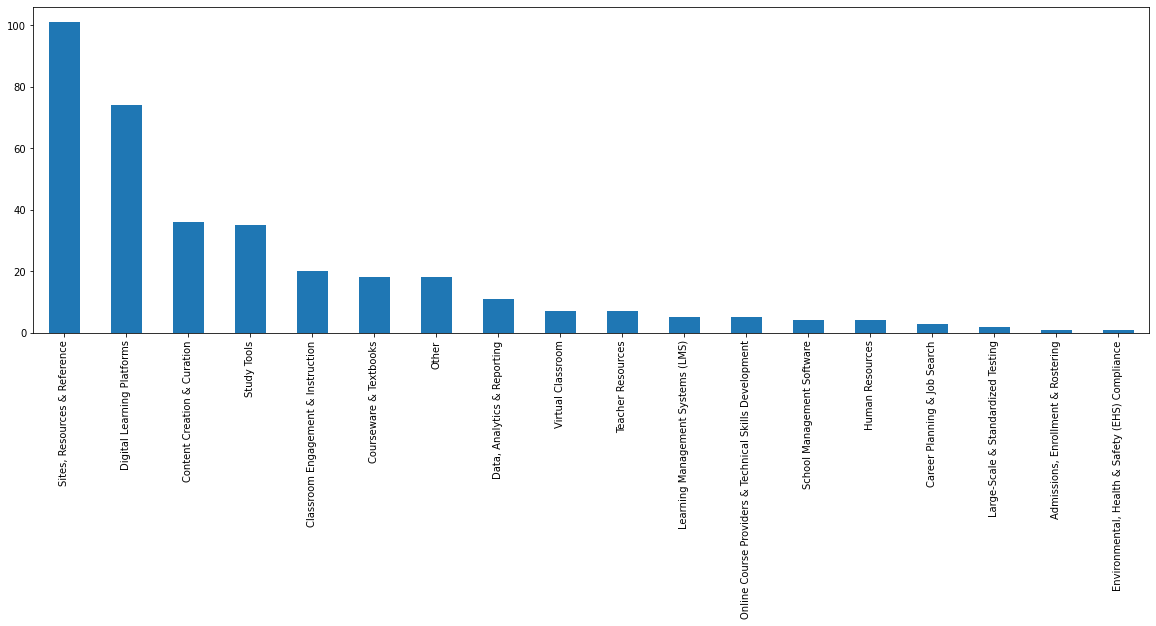

In [28]:
plt.figure(figsize=(20,6))
products['primary_function_sub'].value_counts().plot(kind='bar')

In [29]:
import re
temp_sectors = products['Sector(s)'].str.get_dummies(sep="; ")
temp_sectors.columns = [f"{re.sub(' ', '', c)}_sector" for c in temp_sectors.columns]
products = products.join(temp_sectors)
products.drop("Sector(s)", axis=1, inplace=True)

del temp_sectors



In [30]:
products.head()

,LP ID,URL,Product Name,Provider/Company Name,primary_function_main,primary_function_sub,Corporate_sector,HigherEd_sector,PreK-12_sector
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,LC,Digital Learning Platforms,0,0,1
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",LC,Digital Learning Platforms,0,0,1
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",LC,"Sites, Resources & Reference",0,0,1
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,LC,Digital Learning Platforms,0,1,1
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,LC,Digital Learning Platforms,0,0,1


In [31]:
PATH= '/Users/alchemist/Desktop/Learn Online/engagement_data'

temp = []

for district in districts.district_id.unique():
    df = pd.read_csv(f'{PATH}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    temp.append(df)
    
    


In [32]:
engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)

In [33]:
engagement.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-27,32213.0,100.00,3000.00,8815
1,2020-02-25,90153.0,33.33,2666.67,8815
2,2020-02-25,99916.0,0.00,NaN,8815
3,2020-02-25,28504.0,0.00,NaN,8815
4,2020-02-25,95731.0,33.33,333.33,8815


In [34]:
engagement.groupby('district_id').time.nunique()

district_id
1000    366
1044    366
1052    366
1142    366
1204    366
       ... 
9589    366
9778    366
9812    366
9899    366
9927    366
Name: time, Length: 176, dtype: int64

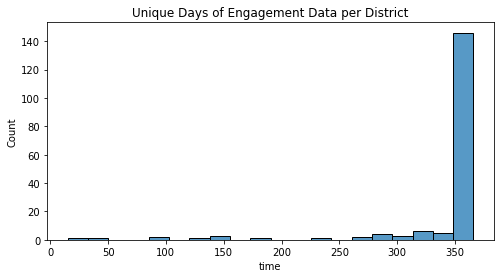

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.histplot(engagement.groupby('district_id').time.nunique(), bins=20)
ax.set_title('Unique Days of Engagement Data per District')
plt.show()

For most district unique days are 366 but there are districts for which we don't have complete data. we would like to remove those to clean our data and analyze better.

In [36]:
# Delete previously created engagement dataframe and create a new one
del engagement

temp = []

for district in districts.district_id.unique():
    df = pd.read_csv(f'{PATH}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    if df.time.nunique() == 366:
        temp.append(df)

engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)

In [37]:
# Only consider districts with full 2020 engagement data
districts = districts[districts.district_id.isin(engagement.district_id.unique())].reset_index(drop=True)
products = products[products['LP ID'].isin(engagement.lp_id.unique())].reset_index(drop=True)

In [38]:
engagement.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,15254.0,0.21,2.07,3710
1,2020-01-01,52755.0,0.21,4.13,3710
2,2020-01-01,32213.0,0.62,12.40,3710
3,2020-01-01,16633.0,0.21,2.07,3710
4,2020-01-01,94324.0,0.21,6.20,3710


In [39]:
engagement['lp_id'].value_counts()

95731.0    48613
99916.0    48455
26488.0    48170
28504.0    48009
33185.0    47267
           ...  
10663.0        1
51527.0        1
83287.0        1
16325.0        1
28144.0        1
Name: lp_id, Length: 8417, dtype: int64

In [40]:
engagement.groupby('district_id').lp_id.nunique()

district_id
1000    3272
1044    5593
1052    2989
1142    1294
1204    1435
        ... 
9589    3061
9778    2879
9812    5056
9899    3042
9927    2905
Name: lp_id, Length: 133, dtype: int64

We can see that most districts use more than the 369 unique products from products_info. In fact, the concatenated engagement data contains more than 8000 unique products. Since we don't have any additional information the majority of these products, we will remove engagement data for unknown products.

In [41]:
len(engagement)

14913939

In [42]:
engagement=engagement[engagement.lp_id.isin(products['LP ID'].unique())]

In [43]:
#length of engagement datafram after removing data for unknown products
len(engagement) 

7784803

In [44]:
#converting time column as datetime
engagement.time = engagement.time.astype('datetime64[ns]')

**Now we will try to analyze pct_access and engagement index.**
 First we will try to remove weekends fromt the data so that our graphs are more clear.

In [45]:
#Monday=0, Sunday=6.
engagement['weekday'] = pd.DatetimeIndex(engagement['time']).weekday
engagement_without_weekends = engagement[engagement.weekday < 5]

In [46]:
engagement_without_weekends.head()

,time,lp_id,pct_access,engagement_index,district_id,weekday
0,2020-01-01,15254.0,0.21,2.07,3710,2
2,2020-01-01,32213.0,0.62,12.40,3710,2
3,2020-01-01,16633.0,0.21,2.07,3710,2
4,2020-01-01,94324.0,0.21,6.20,3710,2
5,2020-01-01,64948.0,0.21,2.07,3710,2


In [47]:
del engagement #to free up some memory

<AxesSubplot:xlabel='time', ylabel='pct_access'>

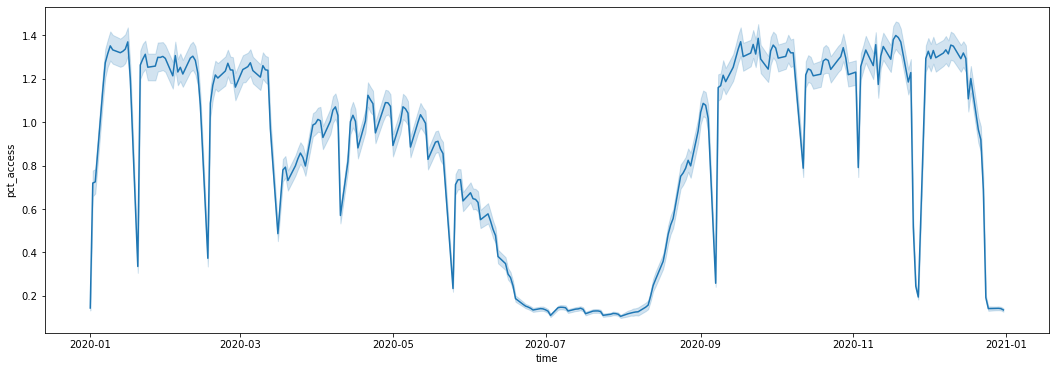

In [48]:
#pct_access: Percentage of students in the district have at least one page-load event of a given product and on a given day
fig, ax = plt.subplots(1, 1, figsize=(18,6))
sns.lineplot(x=engagement_without_weekends.time, y=engagement_without_weekends.pct_access)



From the graph above we can see that march 2020 was start of covid 19 pandemic which reduced pct_access a bit. July 2020-august 2020 was summer holiday and that is why pct_access is close to zero around that time and after that it has increased. There are random dips in graph at few places , which are probably because of national holidays/bank holidays.

<AxesSubplot:xlabel='time', ylabel='engagement_index'>

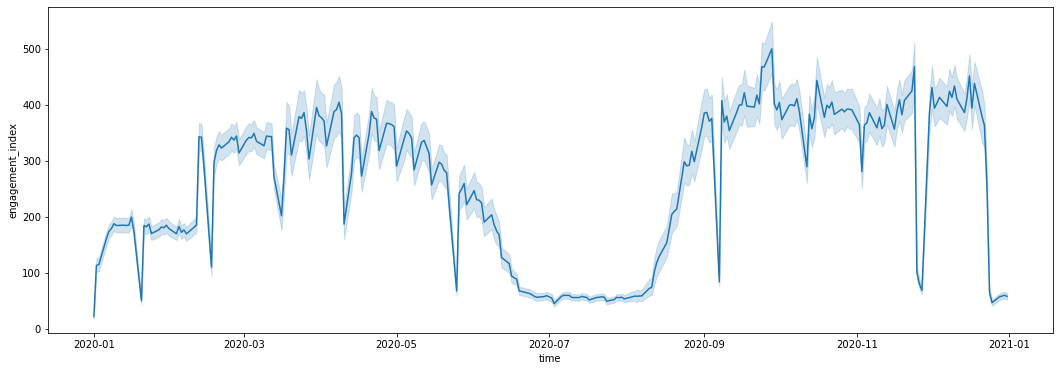

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))

sns.lineplot(x=engagement_without_weekends.time, y=engagement_without_weekends.engagement_index)

In the graph above there is a clear jump in engagement index around march 2020 (Start of pandemic). There is a dip around july 2020 due to summer holidays and then it increased again.There are random dips in graph at few places , which are probably because of national holidays/bank holidays.

In [50]:
len(engagement_without_weekends.district_id.unique())

133

In [51]:
len(districts.district_id.unique())

133

In [52]:
districts[districts['district_id']==3188]

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw


In [53]:
len(engagement_without_weekends.lp_id.unique())

369

In [54]:
len(products['LP ID'].unique())

369

How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?


Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?


In [55]:
#combining the 3 data sets:
combined_data=pd.merge(districts,engagement_without_weekends,how='left',on='district_id')

In [56]:
combined_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,engagement_index,weekday
0,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,15254.0,0.21,2.07,2
1,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,32213.0,0.62,12.40,2
2,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,16633.0,0.21,2.07,2
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,94324.0,0.21,6.20,2
4,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,64948.0,0.21,2.07,2


In [57]:
products.columns=['lp_id', 'URL', 'Product Name', 'Provider/Company Name',
       'primary_function_main', 'primary_function_sub', 'Corporate_sector',
       'HigherEd_sector', 'PreK-12_sector']
products.head()

,lp_id,URL,Product Name,Provider/Company Name,primary_function_main,primary_function_sub,Corporate_sector,HigherEd_sector,PreK-12_sector
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,LC,Digital Learning Platforms,0,0,1
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",LC,Digital Learning Platforms,0,0,1
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",LC,"Sites, Resources & Reference",0,0,1
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,LC,Digital Learning Platforms,0,1,1
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,LC,Digital Learning Platforms,0,0,1


In [58]:
combined_data=pd.merge(combined_data, products, how='left', on= 'lp_id')

In [59]:
combined_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,engagement_index,weekday,URL,Product Name,Provider/Company Name,primary_function_main,primary_function_sub,Corporate_sector,HigherEd_sector,PreK-12_sector
0,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,15254.0,0.21,2.07,2,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,LC,Content Creation & Curation,1,1,1
1,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,32213.0,0.62,12.40,2,https://classroom.google.com,Google Classroom,Google LLC,SDO,Learning Management Systems (LMS),1,1,1
2,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,16633.0,0.21,2.07,2,http://www.cnn.com/cnn10,CNN Student News,Cable News Network,LC,"Sites, Resources & Reference",1,1,1
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,94324.0,0.21,6.20,2,http://www.wevideo.com/education,WeVideo for Schools,"WeVideo, Inc.",LC,Content Creation & Curation,1,1,1
4,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,64948.0,0.21,2.07,2,https://prodigygame.com/,Prodigy,SMARTeacher Inc.,LC,"Sites, Resources & Reference",0,0,1


### EDA on combined data

In [60]:
#Major virtual classroom providers
combined_data[combined_data['primary_function_sub']=='Virtual Classroom']['Product Name'].value_counts()

Zoom                                             31653
Meet                                             25433
Google Hangouts                                  21891
WebEx                                            16320
Loom - Video Recorder: Screen, Webcam and Mic    10266
GoToMeeting                                       8126
ZOOM Cloud Meetings                               8050
Name: Product Name, dtype: int64

In [61]:
#Let us visualize specifically virtual classroom pct_access and engagement index.
df_vc=combined_data[combined_data['primary_function_sub']=='Virtual Classroom']

In [62]:
df_vc.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,engagement_index,weekday,URL,Product Name,Provider/Company Name,primary_function_main,primary_function_sub,Corporate_sector,HigherEd_sector,PreK-12_sector
1068,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-02-10,61945.0,0.0,NaN,0,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
1374,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-02-20,32050.0,0.0,NaN,3,https://www.webex.com/,WebEx,Cisco,CM,Virtual Classroom,1,1,1
2108,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-03-11,61945.0,0.0,NaN,2,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
2234,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-03-13,61945.0,0.0,NaN,4,https://zoom.us/,Zoom,"ZOOM VIDEO COMMUNICATIONS, INC.",CM,Virtual Classroom,1,1,1
2245,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-03-13,32050.0,0.0,NaN,4,https://www.webex.com/,WebEx,Cisco,CM,Virtual Classroom,1,1,1


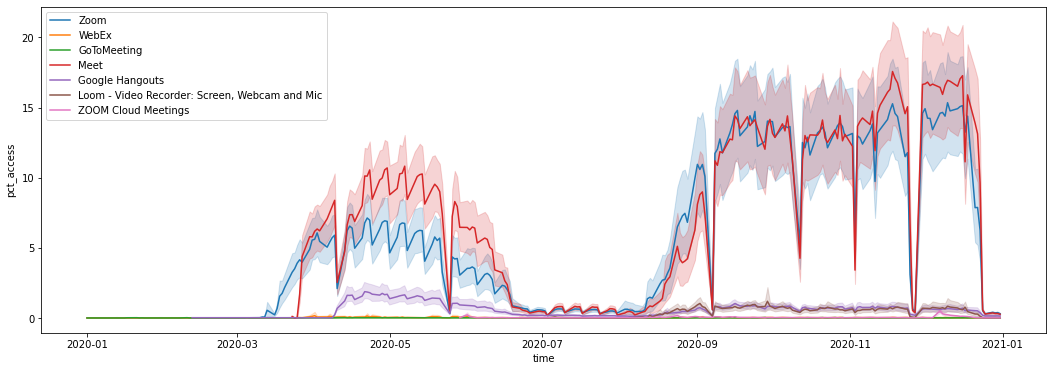

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))

sns.lineplot(x=df_vc.time, y=df_vc.pct_access, hue= df_vc['Product Name']).legend()

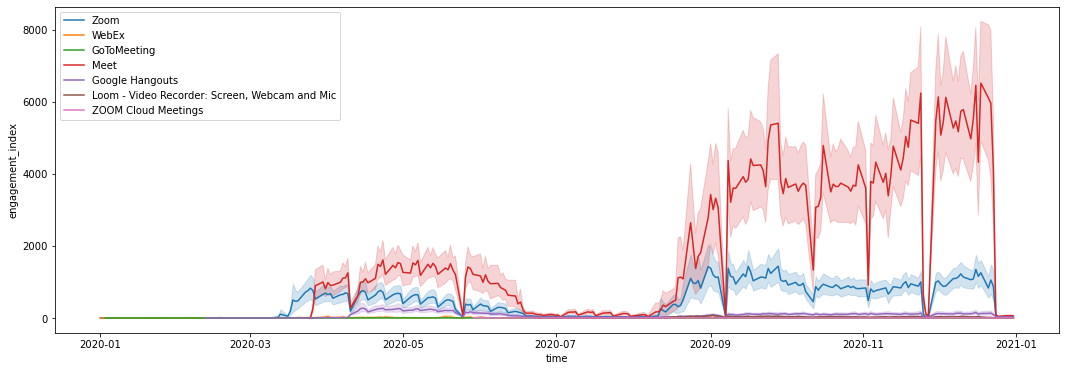

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))

sns.lineplot(x=df_vc.time, y=df_vc.engagement_index,hue= df_vc['Product Name']).legend()

#### Now we will try to visualize how things changed from first quarter of 2020 (before covid) to 4th quarter of 2020 (after second wave of covid)

In [72]:
#adding a quarter column to final dataframe
combined_data['quarter'] = pd.DatetimeIndex(combined_data['time']).quarter.astype(str)

In [75]:
temp= combined_data.groupby(['quarter','primary_function_sub'])['pct_access', 'engagement_index'].mean().reset_index(drop=False)

<ipython-input-75-7d66b67c0657>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [128]:
temp= temp.pivot(index='primary_function_sub', columns='quarter')[['pct_access', 'engagement_index']].fillna(0)

KeyError: "None of ['primary_function_sub', 'quarter'] are in the columns"

In [89]:
temp.head()

pct_access                                \
quarter                                     1         2         3         4   
primary_function_sub                                                          
Admissions, Enrollment & Rostering   1.419055  0.623071  0.207302  0.136495   
Career Planning & Job Search         0.212434  0.086064  0.107874  0.238994   
Classroom Engagement & Instruction   1.091573  1.198146  0.849522  1.391952   
Content Creation & Curation          2.022470  1.434849  1.020494  1.781846   
Courseware & Textbooks               0.461140  0.285630  0.348731  0.510491   

                                   engagement_index                           \
quarter                                           1            2           3   
primary_function_sub                                                           
Admissions, Enrollment & Rostering        36.665166     8.828170    3.505576   
Career Planning & Job Search              52.033612    19.828973   34.113316   
Classroom Engagement & Instruction       229.420386   296.847030  185.504142   
Content Creation & Curation              717.689512  1264.818029  867.927957   
Courseware & Textbooks                   106.178040    79.243581   98.275646   

                                                 
quarter                                       4  
primary_function_sub                             
Admissions, Enrollment & Rostering     2.007157  
Career Planning & Job Search          73.567808  
Classroom Engagement & Instruction   229.021761  
Content Creation & Curation         1321.201090  
Courseware & Textbooks                97.056115

In [117]:
temp['pct_access_1']=temp.loc[:,('pct_access',['1'])]

temp['pct_access_4']=temp.loc[:,('pct_access',['4'])]

SyntaxError: invalid syntax (<ipython-input-117-dc525955f9da>, line 1)

In [121]:
temp['engagement_index_1']=temp.loc[:,('engagement_index',['1'])]

temp['engagement_index_4']=temp.loc[:,('engagement_index',['4'])]

In [122]:
temp['pct_access_delta']=temp['pct_access_4']- temp['pct_access_1']
temp['engagement_index_delta']=temp['engagement_index_4']- temp['engagement_index_1']

In [133]:
temp.reset_index(inplace=True)
#temp.head(50)

primary_function_sub pct_access  \
quarter                                                             1   
0                       Admissions, Enrollment & Rostering   1.419055   
1                             Career Planning & Job Search   0.212434   
2                       Classroom Engagement & Instruction   1.091573   
3                              Content Creation & Curation   2.022470   
4                                   Courseware & Textbooks   0.461140   
5                              Data, Analytics & Reporting   1.978469   
6                               Digital Learning Platforms   1.054835   
7          Environmental, Health & Safety (EHS) Compliance   0.008509   
8                                          Human Resources   0.064644   
9                       Large-Scale & Standardized Testing   0.228053   
10                       Learning Management Systems (LMS)   9.215383   
11       Online Course Providers & Technical Skills Dev...   2.654566   
12                                                   Other   2.213223   
13                              School Management Software   8.838505   
14                            Sites, Resources & Reference   0.398825   
15                                             Study Tools   0.739903   
16                                       Teacher Resources   0.098234   
17                                       Virtual Classroom   0.731580   

                                       engagement_index               \
quarter         2         3          4                1            2   
0        0.623071  0.207302   0.136495        36.665166     8.828170   
1        0.086064  0.107874   0.238994        52.033612    19.828973   
2        1.198146  0.849522   1.391952       229.420386   296.847030   
3        1.434849  1.020494   1.781846       717.689512  1264.818029   
4        0.285630  0.348731   0.510491       106.178040    79.243581   
5        0.879313  0.726415   1.381540       239.425444   103.702146   
6        0.610967  0.604911   1.022780       196.043491    99.289763   
7        0.007016  0.012225   0.007483        39.363597    21.473057   
8        0.039576  0.020972   0.053580         6.558432     3.270812   
9        0.217773  0.178595   0.247721         9.522145    12.394586   
10       7.743065  5.678964  12.321444      2954.474829  3733.046120   
11       1.612486  2.551856   4.146027       992.068503   908.798056   
12       1.598647  0.855922   1.406619       252.107760   264.359509   
13       4.197306  4.545751   7.863409       668.794610   245.834241   
14       0.228114  0.348592   0.511724        50.255656    37.068956   
15       0.343843  0.362931   0.602401       266.115134    77.560090   
16       0.063836  0.045759   0.096367        17.567828    12.027771   
17       2.992150  2.406639   5.313325       265.499085   454.931724   

                                  pct_access_1 pct_access_4 pct_access_delta  \
quarter            3            4                                              
0           3.505576     2.007157     1.419055     0.136495        -1.282560   
1          34.113316    73.567808     0.212434     0.238994         0.026560   
2         185.504142   229.021761     1.091573     1.391952         0.300379   
3         867.927957  1321.201090     2.022470     1.781846        -0.240624   
4          98.275646    97.056115     0.461140     0.510491         0.049351   
5         100.693365   143.122819     1.978469     1.381540        -0.596929   
6         103.665324   139.723799     1.054835     1.022780        -0.032055   
7          24.629531     9.493222     0.008509     0.007483        -0.001026   
8           2.280868     5.020325     0.064644     0.053580        -0.011064   
9           8.772799     8.863400     0.228053     0.247721         0.019668   
10       2996.446487  5295.993101     9.215383    12.321444         3.106061   
11       1726.649754  1871.159416     2.654566     4.146027         1.491460   
12        180.87

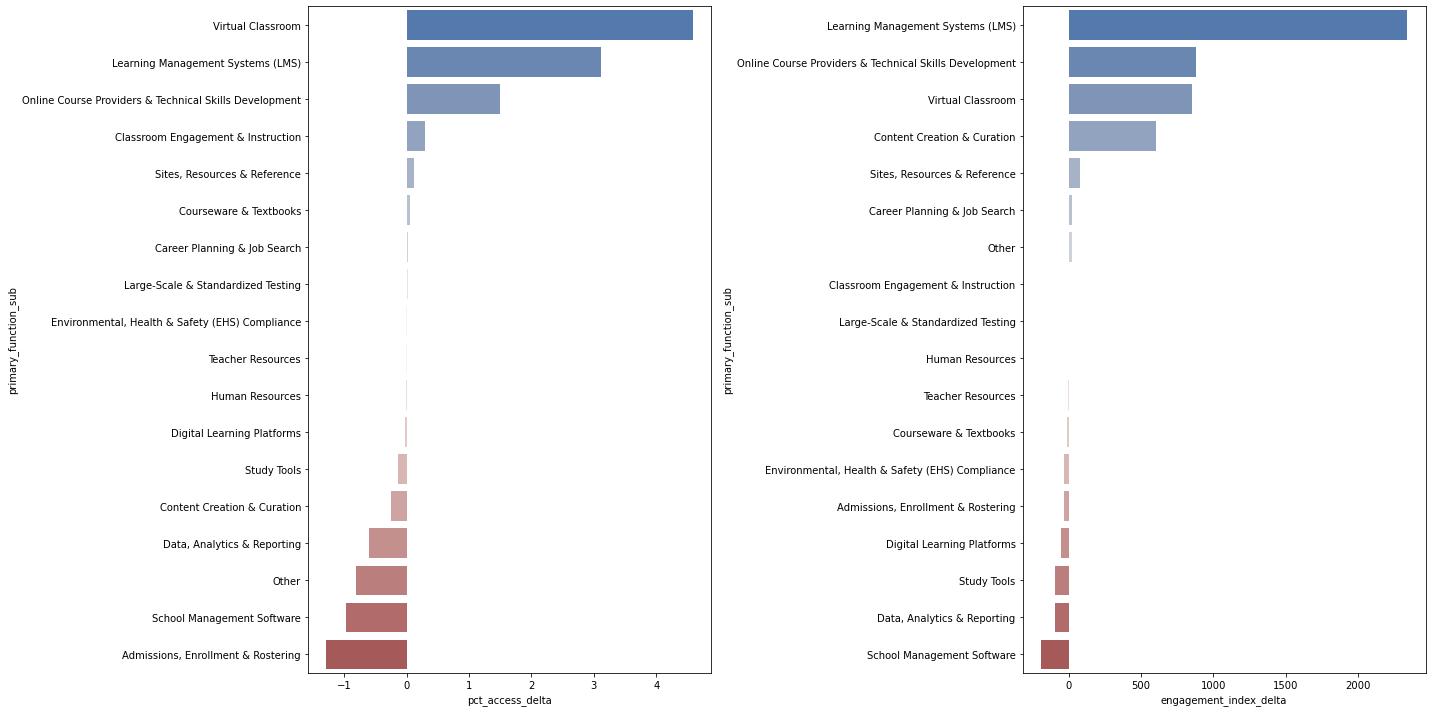

In [138]:
f, ax = plt.subplots(1,2, figsize=(20, 10))

df1 = temp.sort_values(by='pct_access_delta', ascending=False)

sns.barplot(data=df1, x='pct_access_delta', y='primary_function_sub', palette='vlag', ax=ax[0])

df2 = temp.sort_values(by='engagement_index_delta', ascending=False)#.head(5)

sns.barplot(data=df2, x='engagement_index_delta', y='primary_function_sub', palette='vlag', ax=ax[1])

plt.tight_layout()
plt.show()

#### We can see from the above graphs that pct_access for virtual classroom, LMS and online course providers has increased the most from 1st quarter to 4th quarter of 2021. and admissions has decresed.
#### engagement_index has increased for LMS, online course providers and virtual classrooms which makes sense because as the pademic progressed more and more schools opted for online learning. 

In [143]:
del temp
# now that we are done with the visualization we can delete the dataframe temp.

In [146]:
temp= combined_data.groupby(['quarter','Product Name'])['pct_access', 'engagement_index'].mean().reset_index(drop=False)

<ipython-input-146-ad36f539850a>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [147]:
temp = temp.pivot(index='Product Name', columns='quarter')[['pct_access', 'engagement_index']].fillna(0).reset_index()
temp.columns = ["_".join(a) for a in temp.columns.to_flat_index()]

In [149]:
temp['pct_access_delta']=temp['pct_access_4']- temp['pct_access_1']
temp['engagement_index_delta']=temp['engagement_index_4']- temp['engagement_index_1']

In [150]:
temp.head()

,Product Name_,pct_access_1,pct_access_2,pct_access_3,pct_access_4,engagement_index_1,engagement_index_2,engagement_index_3,engagement_index_4,pct_access_delta,engagement_index_delta
0,ABC News,0.084523,0.046341,0.028591,0.057260,5.063295,2.783035,2.154011,4.021731,-0.027264,-1.041564
1,ABCmouse.com,0.100184,0.080458,0.064285,0.082389,51.992099,35.950752,20.291025,18.680126,-0.017795,-33.311972
2,ABCya!,1.468147,0.633962,0.805327,1.523859,233.776031,102.547111,112.161988,179.437818,0.055712,-54.338214
3,ALEKS,2.389924,0.714842,1.050420,1.923711,630.383956,201.009013,282.136840,373.262577,-0.466213,-257.121380
4,AP Central,0.087585,0.165066,0.039923,0.045383,8.918489,16.440249,3.172829,3.386600,-0.042202,-5.531889


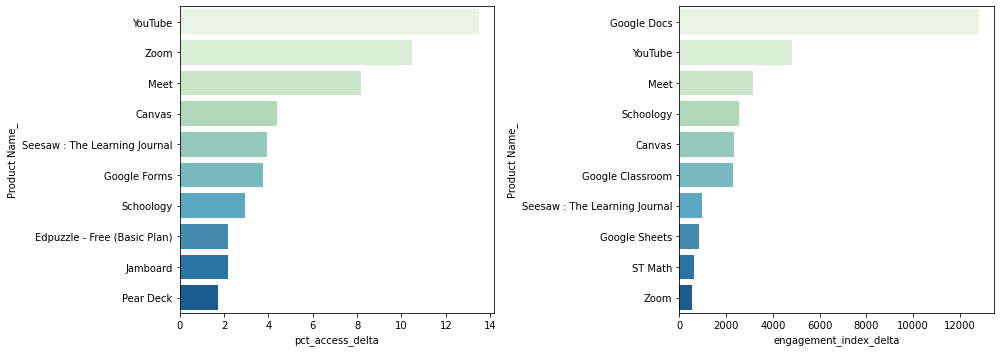

In [152]:
f, ax = plt.subplots(1,2, figsize=(14, 5))

df1 = temp.sort_values(by='pct_access_delta', ascending=False).head(10)

sns.barplot(data=df1, x='pct_access_delta', y='Product Name_', palette='GnBu', ax=ax[0])

df2= temp.sort_values(by='engagement_index_delta', ascending=False).head(10)

sns.barplot(data=df2, x='engagement_index_delta', y='Product Name_', palette='GnBu', ax=ax[1])
plt.tight_layout()
plt.show()


In [153]:
del temp

In [154]:
combined_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,...,weekday,URL,Product Name,Provider/Company Name,primary_function_main,primary_function_sub,Corporate_sector,HigherEd_sector,PreK-12_sector,quarter
0,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,15254.0,0.21,...,2,http://appinventor.mit.edu/explore/,MIT App Inventor,Massachusetts Institute of Technology,LC,Content Creation & Curation,1,1,1,1
1,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,32213.0,0.62,...,2,https://classroom.google.com,Google Classroom,Google LLC,SDO,Learning Management Systems (LMS),1,1,1,1
2,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,16633.0,0.21,...,2,http://www.cnn.com/cnn10,CNN Student News,Cable News Network,LC,"Sites, Resources & Reference",1,1,1,1
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,94324.0,0.21,...,2,http://www.wevideo.com/education,WeVideo for Schools,"WeVideo, Inc.",LC,Content Creation & Curation,1,1,1,1
4,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",2020-01-01,64948.0,0.21,...,2,https://prodigygame.com/,Prodigy,SMARTeacher Inc.,LC,"Sites, Resources & Reference",0,0,1,1


In [157]:
#statewise pct_access and engagement_index

temp= combined_data.groupby(['state'])['pct_access', 'engagement_index'].mean().reset_index(drop=False)



<ipython-input-157-6b74f9914cc9>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='state', ylabel='pct_access'>

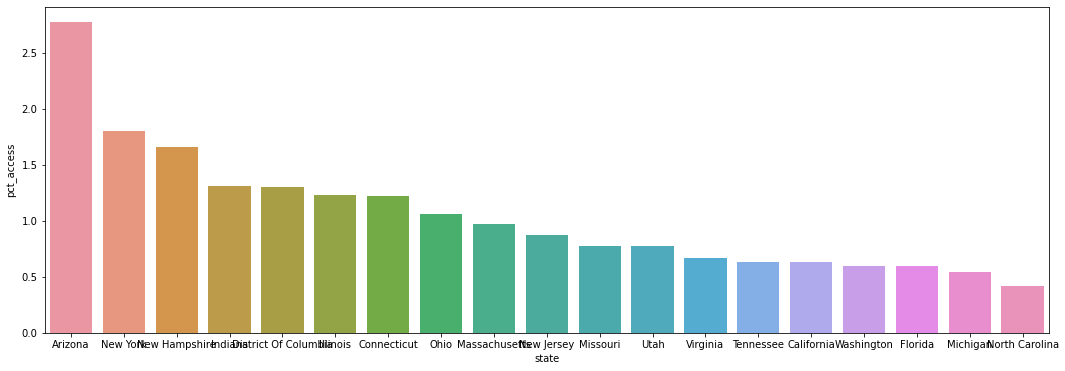

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))
df=temp.sort_values(by='pct_access',ascending= False).head(25)

sns.barplot(x='state',y='pct_access',data=df)

<AxesSubplot:xlabel='state', ylabel='engagement_index'>

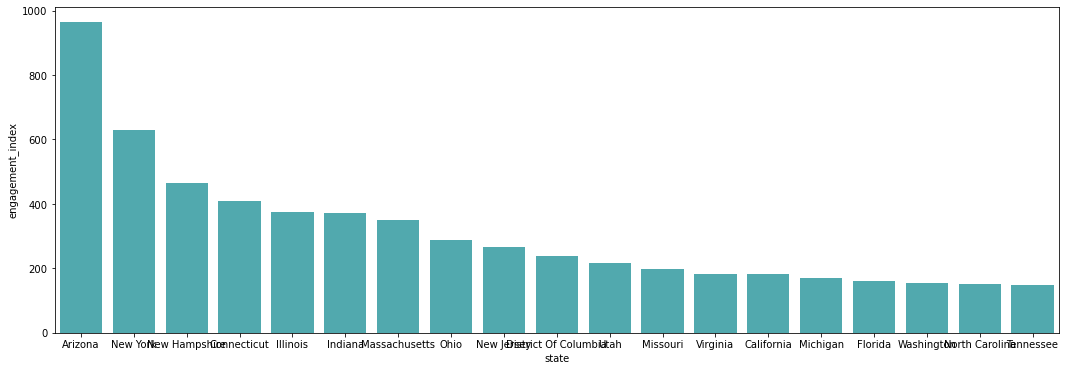

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))
df=temp.sort_values(by='engagement_index',ascending= False).head(25)

sns.barplot(x='state',y='engagement_index',data=df,color='#42b7bd')